# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [53]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [54]:
air_df = pd.read_csv('cleaned_aviation_data.csv')
air_df.head()

C:\Users\obvioussmell\AppData\Local\Temp\ipykernel_110684\3632784402.py:1: DtypeWarning: Columns (6,7,25) have mixed types. Specify dtype option on import or set low_memory=False.
  air_df = pd.read_csv('cleaned_aviation_data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Report_Date,N_passenger,ser_inj_frac,is_destroyed,make_model
0,20020917X01894,Accident,CHI82FEC08,1982-01-02,"YPSILANTI, MI",United States,NaN,NaN,YIP,WILLOW RUN,...,1.0,VMC,Takeoff,Probable Cause,02-01-1983,1983-01-02,1.0,0.0,0,CESSNA_152
1,20020917X01656,Accident,ANC82FAG14,1982-01-02,"SKWENTA, AK",United States,NaN,NaN,NaN,NaN,...,0.0,VMC,NaN,Probable Cause,02-01-1983,1983-01-02,3.0,1.0,1,CESSNA_180
2,20020917X02117,Accident,FTW82FPG08,1982-01-02,"LITTLE ROCK, AR",United States,NaN,NaN,NaN,NaN,...,0.0,IMC,Cruise,Probable Cause,02-01-1983,1983-01-02,2.0,1.0,1,BEECH_19
3,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,...,0.0,IMC,Cruise,Probable Cause,02-01-1983,1983-01-02,1.0,1.0,1,NAVION_A
4,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1983-01-02,1.0,1.0,1,CESSNA_R172K


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [55]:
# Check coloumn names to make sure they are correct
print(air_df.columns.tolist())

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Report_Date', 'N_passenger', 'ser_inj_frac', 'is_destroyed', 'make_model']


In [56]:
# check column names and sample rows to find relevent ones
air_df[['Make', 'Model', 'Total.Fatal.Injuries', 'N_passenger']].head()

,Make,Model,Total.Fatal.Injuries,N_passenger
0,CESSNA,152,0.0,1.0
1,CESSNA,180,3.0,3.0
2,BEECH,19,2.0,2.0
3,NAVION,A,1.0,1.0
4,CESSNA,R172K,1.0,1.0


In [57]:
# passenger threshold is 20
small_planes = air_df[air_df['N_passenger'] < 20]
large_planes = air_df[air_df['N_passenger'] >= 20]

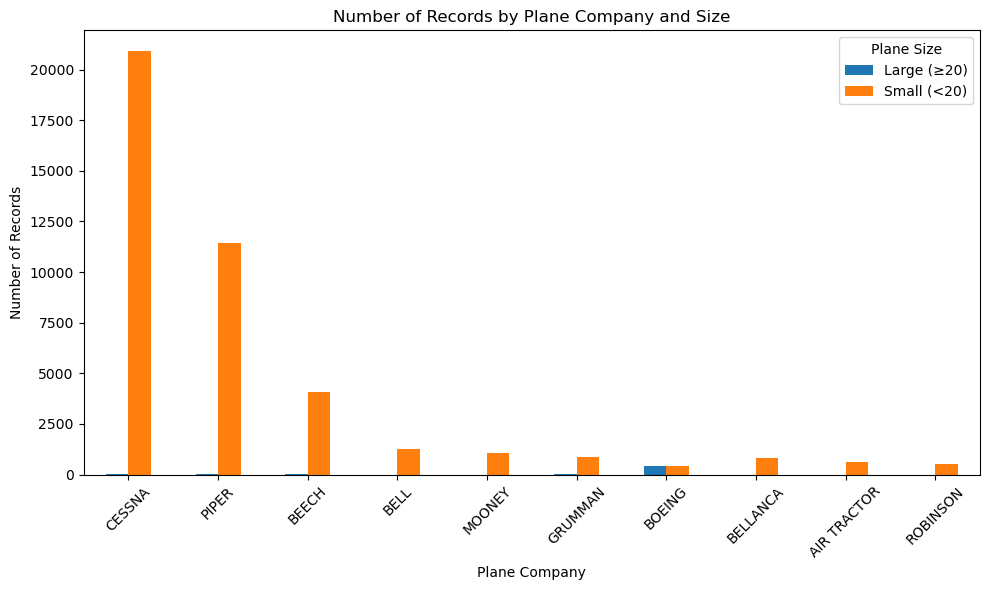

In [58]:
# create a bar graph showing data of smaller airplanes and larger airplanes with passenger threshold of 20import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# create 'Plane_Size' column based on passenger threshold
air_df['Plane_Size'] = air_df['N_passenger'].apply(lambda x: 'Small (<20)' if x < 20 else 'Large (≥20)')

# group by Make (company) and Plane Size
company_grouped = air_df.groupby(['Plane_Size', 'Make']).size().unstack(fill_value=0)

# limit to top 10 most common makes to keep the chart clean (optional)
top_makes = air_df['Make'].value_counts().head(10).index
company_grouped = company_grouped[top_makes].T  # Transpose so makes go on x-axis

# plot
company_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Records by Plane Company and Size')
plt.ylabel('Number of Records')
plt.xlabel('Plane Company')
plt.xticks(rotation=45)
plt.legend(title='Plane Size')
plt.tight_layout()
plt.show()

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [59]:
# fatal/seriously injured fraction
air_df["Injury.Fraction"] = (
    air_df["Total.Fatal.Injuries"] + air_df["Total.Serious.Injuries"]
) / (
    air_df["Total.Fatal.Injuries"] +
    air_df["Total.Serious.Injuries"] +
    air_df["Total.Minor.Injuries"] +
    air_df["Total.Uninjured"]
)


In [60]:
# show all injury details along with Injury.Fraction
air_df[[
    "Make",
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured",
    "Injury.Fraction"
]].head(10)

,Make,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Injury.Fraction
0,CESSNA,0.0,0.0,0.0,1.0,0.0
1,CESSNA,3.0,0.0,0.0,0.0,1.0
2,BEECH,2.0,0.0,0.0,0.0,1.0
3,NAVION,1.0,0.0,0.0,0.0,1.0
4,CESSNA,1.0,0.0,0.0,0.0,1.0
5,CESSNA,0.0,0.0,0.0,1.0,0.0
6,CESSNA,0.0,0.0,0.0,2.0,0.0
7,BELLANCA,0.0,0.0,1.0,0.0,0.0
8,MAULE,0.0,0.0,0.0,2.0,0.0
9,BELLANCA,0.0,0.0,2.0,0.0,0.0


In [62]:
# 15 makes for each group possessing the lowest mean fatal/seriously injured fraction 

small_makes = small_planes.groupby("Make")["ser_inj_frac"].mean().nsmallest(15)
large_makes = large_planes.groupby("Make")["ser_inj_frac"].mean().nsmallest(15)


In [63]:
print("Small aircraft (≤20 pax) safest makes:")
print(small_makes)

print("\nLarge aircraft (>20 pax) safest makes:")
print(large_makes)

Small aircraft (≤20 pax) safest makes:
Make
AIRBUS INDUSTRIE      0.000000
GRUMMAN-SCHWEIZER     0.099727
WACO                  0.106183
HELIO                 0.120766
BOEING                0.146617
ENSTROM               0.152263
MAULE                 0.157029
AVIAT AIRCRAFT INC    0.157143
HILLER                0.166667
SWEARINGEN            0.172631
SCHWEIZER             0.179592
STINSON               0.189647
AVIAT                 0.192593
WEATHERLY             0.197368
GRUMMAN               0.199589
Name: ser_inj_frac, dtype: float64

Large aircraft (>20 pax) safest makes:
Make
AERO COMMANDER               0.000000
DEHAVILLAND                  0.000000
SWEARINGEN                   0.000000
AEROSPATIALE                 0.003388
CESSNA                       0.003521
AIRBUS INDUSTRIE             0.023445
LOCKHEED                     0.030229
MCDONNELL DOUGLAS            0.034829
AIRBUS                       0.044203
BOEING                       0.050004
FAIRCHILD                    0.

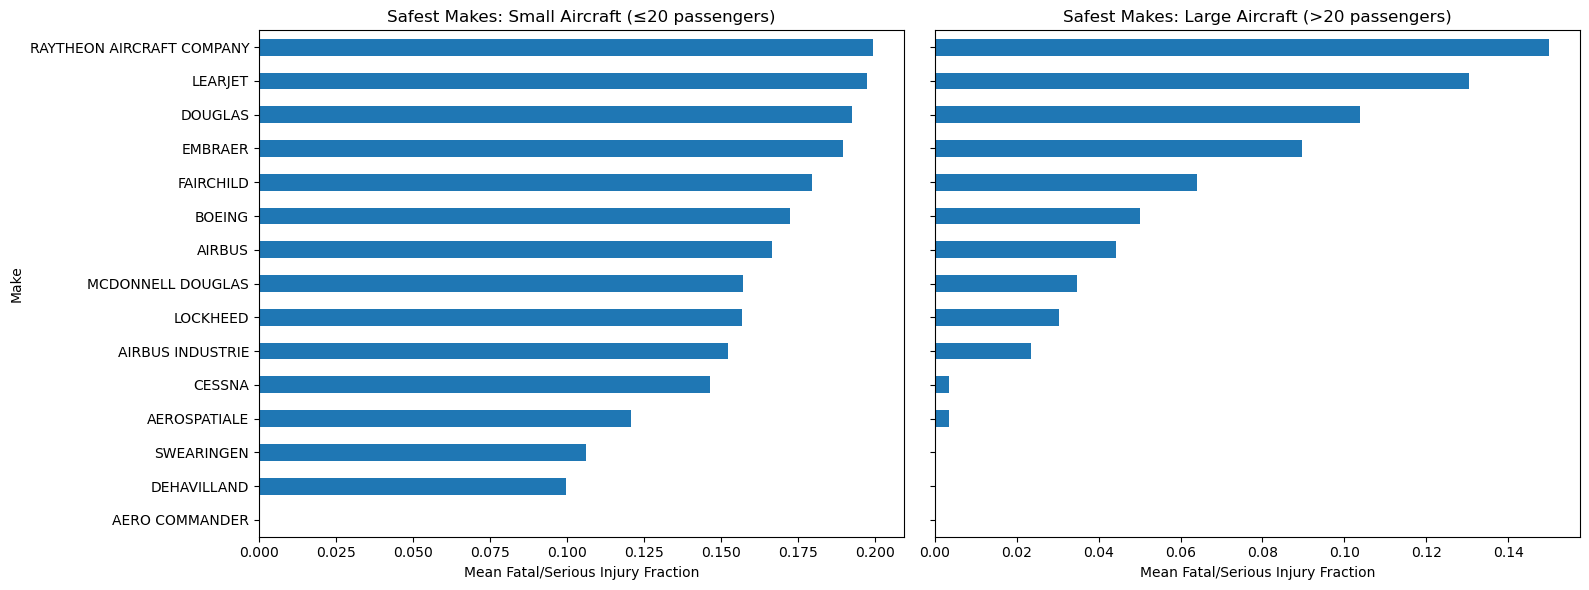

In [64]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

small_makes.plot(kind="barh", ax=axes[0], title="Safest Makes: Small Aircraft (≤20 passengers)")
large_makes.plot(kind="barh", ax=axes[1], title="Safest Makes: Large Aircraft (>20 passengers)")

axes[0].set_xlabel("Mean Fatal/Serious Injury Fraction")
axes[1].set_xlabel("Mean Fatal/Serious Injury Fraction")

axes[0].set_ylabel("Make")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

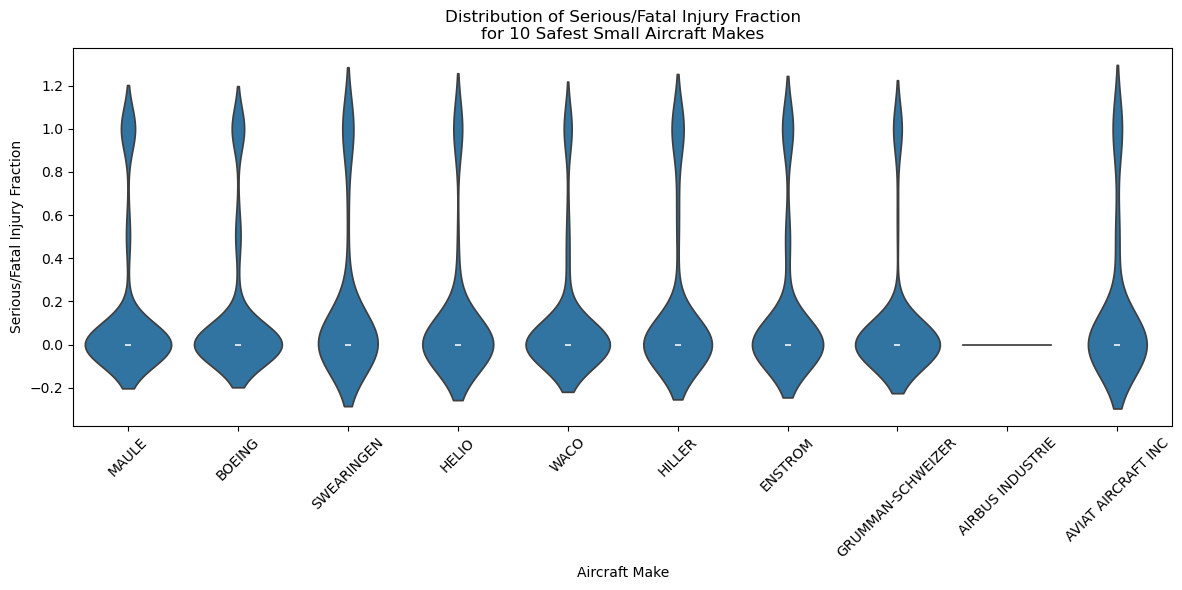

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
lowest_10_makes = (
    small_planes.groupby("Make")["ser_inj_frac"]
    .mean()
    .nsmallest(10)
    .index
)

# filter small_planes for those 10 makes only
filtered_small = small_planes[small_planes["Make"].isin(lowest_10_makes)]

# create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_small, x="Make", y="ser_inj_frac")
plt.title("Distribution of Serious/Fatal Injury Fraction\nfor 10 Safest Small Aircraft Makes")
plt.ylabel("Serious/Fatal Injury Fraction")
plt.xlabel("Aircraft Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

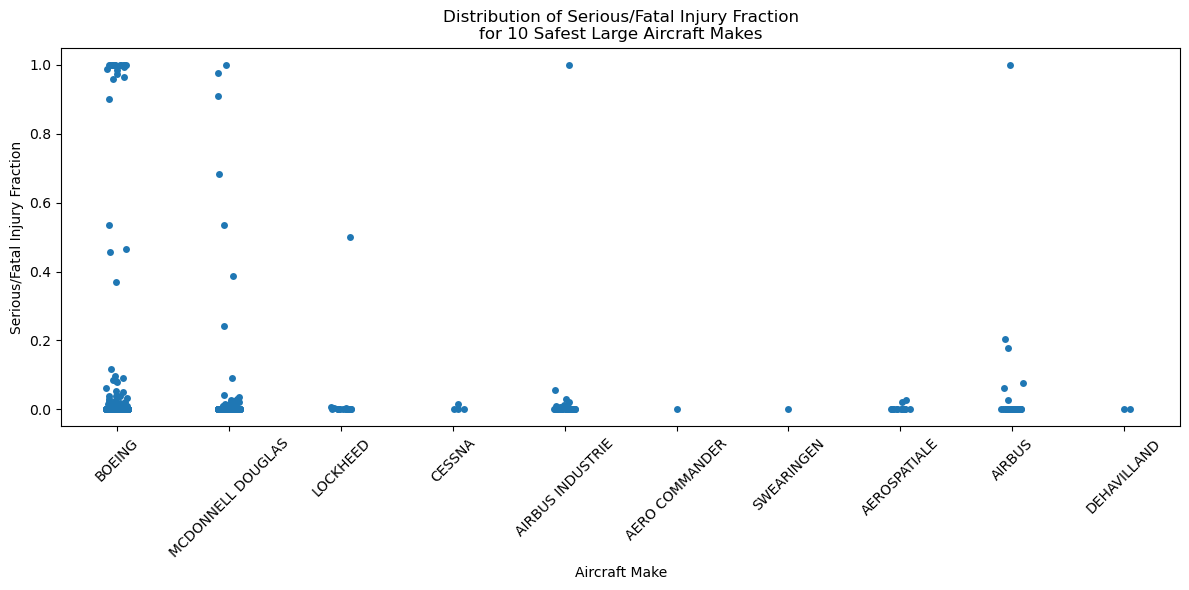

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# get the 10 makes with the lowest mean serious/fatal injury rate (for large planes)
lowest_10_large_makes = (
    large_planes.groupby("Make")["ser_inj_frac"]
    .mean()
    .nsmallest(10)
    .index
)

# filter large_planes to just those makes
filtered_large = large_planes[large_planes["Make"].isin(lowest_10_large_makes)]

# create the stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(data=filtered_large, x="Make", y="ser_inj_frac", jitter=True)
plt.title("Distribution of Serious/Fatal Injury Fraction\nfor 10 Safest Large Aircraft Makes")
plt.ylabel("Serious/Fatal Injury Fraction")
plt.xlabel("Aircraft Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [68]:
small_destruction = (small_planes.groupby("Make")["is_destroyed"].mean().nsmallest(15))
large_destruction = (large_planes.groupby("Make")["is_destroyed"].mean().nsmallest(15))

print("Lowest destruction rates - Small Aircraft:")
print(small_destruction)

print("\nLowest destruction rates - Large Aircraft:")
print(large_destruction)

Lowest destruction rates - Small Aircraft:
Make
AIRBUS INDUSTRIE                  0.000000
GRUMMAN ACFT ENG COR-SCHWEIZER    0.000000
AMERICAN CHAMPION AIRCRAFT        0.022727
DIAMOND AIRCRAFT IND INC          0.030769
DEHAVILLAND                       0.035714
AVIAT AIRCRAFT INC                0.042857
AVIAT                             0.066667
WACO                              0.072581
MAULE                             0.091858
LUSCOMBE                          0.094395
AIR TRACTOR INC                   0.101124
BOEING                            0.104623
TAYLORCRAFT                       0.107843
STINSON                           0.111421
ROCKWELL INTERNATIONAL            0.121212
Name: is_destroyed, dtype: float64

Lowest destruction rates - Large Aircraft:
Make
AERO COMMANDER               0.000000
AEROSPATIALE                 0.000000
DEHAVILLAND                  0.000000
RAYTHEON AIRCRAFT COMPANY    0.000000
SWEARINGEN                   0.000000
AIRBUS INDUSTRIE             0.02

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

After reviewing the data, a few key trends stood out. For small aircraft, the injury rates varied a lot. Some makes showed pretty high serious or fatal injury fractions, while others performed much better. The violin plot highlighted this spread clearly, showing that not all small aircraft makes are equally safe when accidents happen. In contrast, large aircraft had more consistent injury rates overall, although there were still a few makes with higher than expected figures. By narrowing down to the ten makes with the lowest average serious/fatal injury fractions, we were able to identify the safest performers in each category.

When looking at aircraft destruction, the results were also interesting. Some makes had a very low percentage of incidents where the aircraft was totally destroyed. That could point to stronger design, better crash resilience, or effective emergency responses. It's worth noting that the makes with low destruction rates didn’t always match those with low injury rates, so both perspectives matter.

Overall, based on this analysis, the best recommendations would be to favor aircraft makes that rank low in both injury and destruction rates. These makes seem to offer the most protection for both the passengers and the structure of the aircraft itself. And especially for small planes, keep an eye on the makes with wide variation in injury rates — it suggests their safety outcomes aren’t very predictable.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

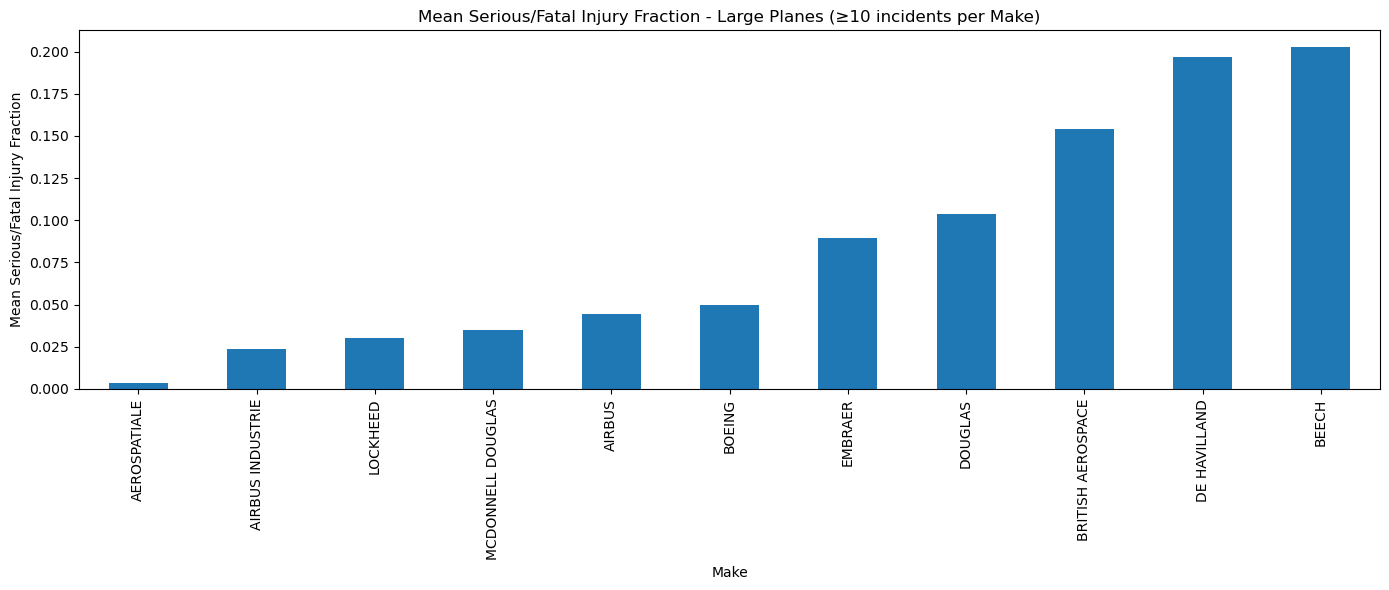

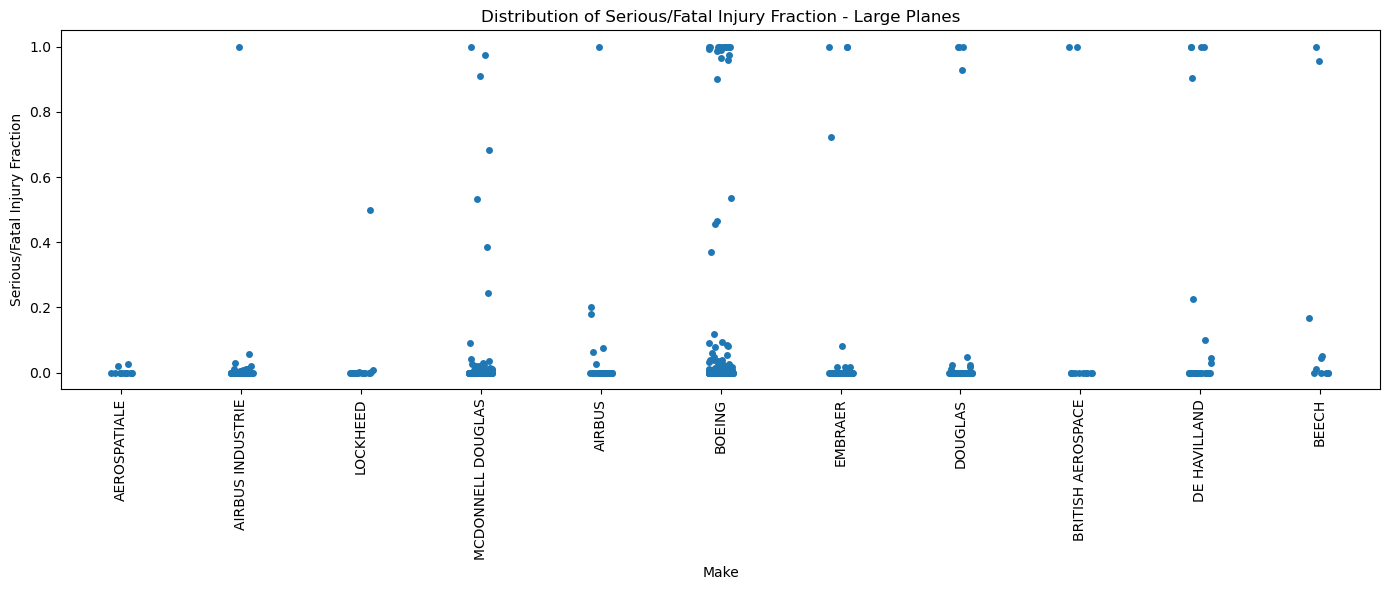

In [69]:
# filter to makes with at least 10 incidents
large_make_counts = large_planes["Make"].value_counts()
large_filtered = large_planes[large_planes["Make"].isin(large_make_counts[large_make_counts >= 10].index)]

# calculate mean serious/fatal injury fraction
large_means = large_filtered.groupby("Make")["ser_inj_frac"].mean().sort_values()

# plot bar chart of mean injury fraction
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
large_means.plot(kind="bar")
plt.title("Mean Serious/Fatal Injury Fraction - Large Planes (≥10 incidents per Make)")
plt.ylabel("Mean Serious/Fatal Injury Fraction")
plt.xlabel("Make")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# stripplot to show distribution
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.stripplot(data=large_filtered, x="Make", y="ser_inj_frac", order=large_means.index, jitter=True)
plt.title("Distribution of Serious/Fatal Injury Fraction - Large Planes")
plt.ylabel("Serious/Fatal Injury Fraction")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

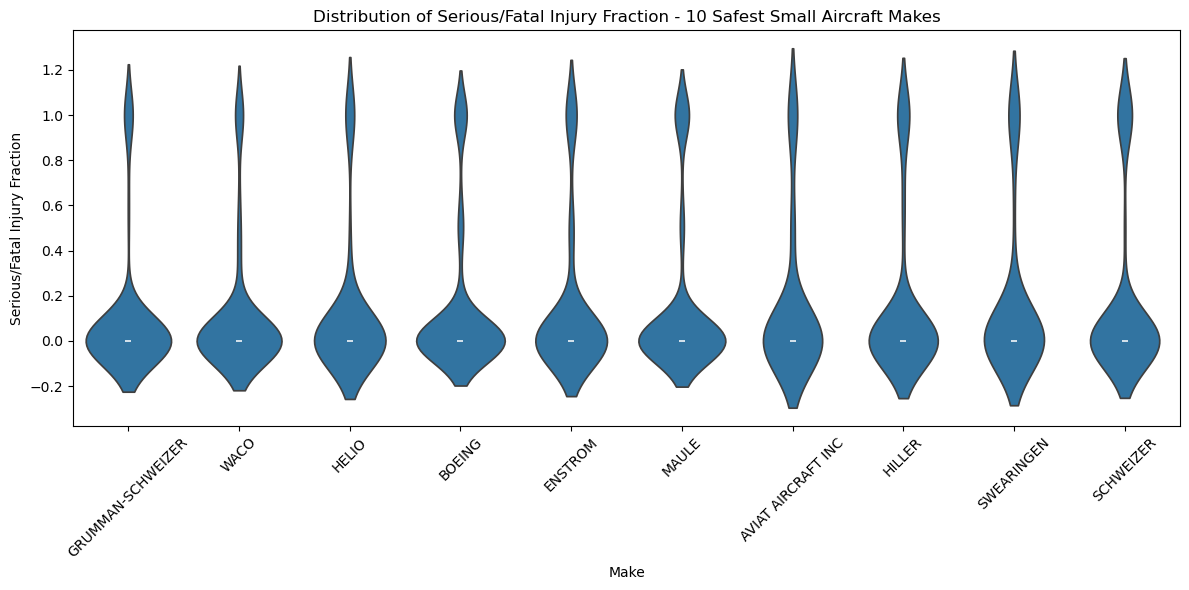

In [70]:
# filter to makes with at least 10 incidents
small_make_counts = small_planes["Make"].value_counts()
small_filtered = small_planes[small_planes["Make"].isin(small_make_counts[small_make_counts >= 10].index)]

# get 10 makes with lowest mean serious/fatal injury fraction
small_means = small_filtered.groupby("Make")["ser_inj_frac"].mean().nsmallest(10)
small_final = small_filtered[small_filtered["Make"].isin(small_means.index)]

# violin plot of injury fraction for top 10 safest small plane makes
plt.figure(figsize=(12, 6))
sns.violinplot(data=small_final, x="Make", y="ser_inj_frac", order=small_means.index)
plt.title("Distribution of Serious/Fatal Injury Fraction - 10 Safest Small Aircraft Makes")
plt.ylabel("Serious/Fatal Injury Fraction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

When looking at passenger injury fractions for different airplane models, a few interesting patterns stood out. For small planes, the data showed a lot more variability. Some makes had really low injury fractions, while others were noticeably higher. This was clear in the violin plots where the shapes were more spread out, suggesting that the safety performance of small aircraft varies quite a bit depending on the make. On the other hand, large aircraft makes tended to be more consistent. While not all large models had great scores, the distribution of serious/fatal injury fractions was generally tighter, with fewer extreme values. Makes that had at least ten incidents gave us a more reliable average, and focusing on those helped avoid skewed results from rare aircraft. Overall, some airplane types clearly perform better than others in terms of passenger safety, and this kind of breakdown helps highlight which makes are most consistently safer — and which ones may need a closer look.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

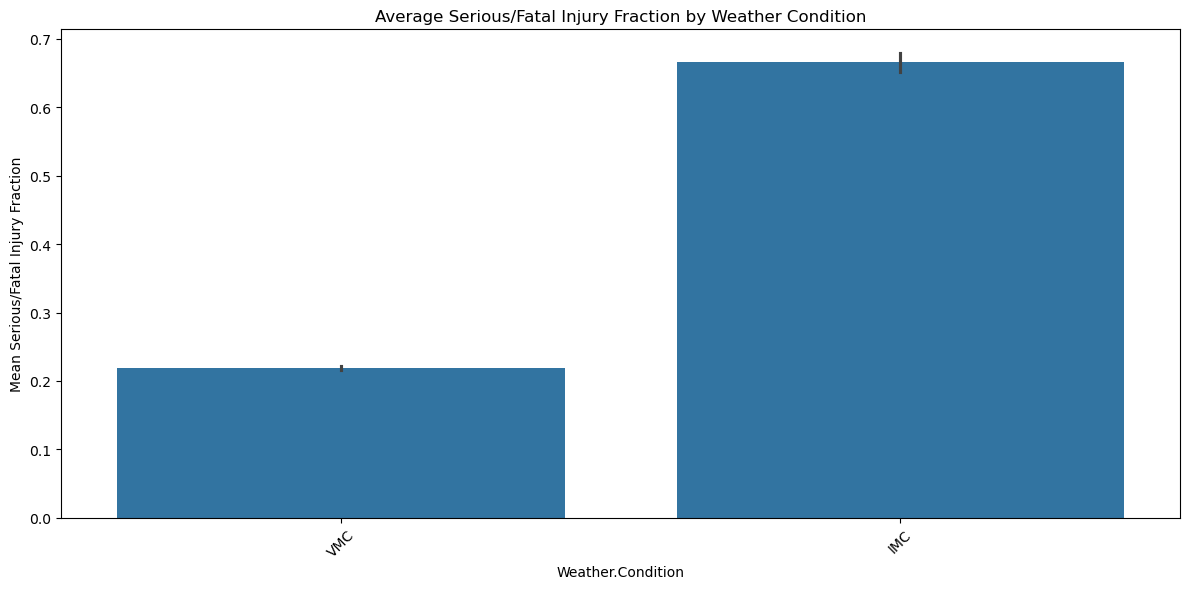

In [71]:
# group by Weather.Condition, require at least 10 samples
weather_counts = air_df["Weather.Condition"].value_counts()
valid_weather = weather_counts[weather_counts >= 10].index
weather_filtered = air_df[air_df["Weather.Condition"].isin(valid_weather)]

# plot mean injury fraction by weather condition
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=weather_filtered, x="Weather.Condition", y="ser_inj_frac", estimator='mean')
plt.title("Average Serious/Fatal Injury Fraction by Weather Condition")
plt.ylabel("Mean Serious/Fatal Injury Fraction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Weather does seem to impact injury outcomes. Conditions like fog, snow, or thunderstorms are often associated with higher injury fractions compared to clear weather. This suggests visibility and environmental hazards could play a big role in how severe an accident ends up being.

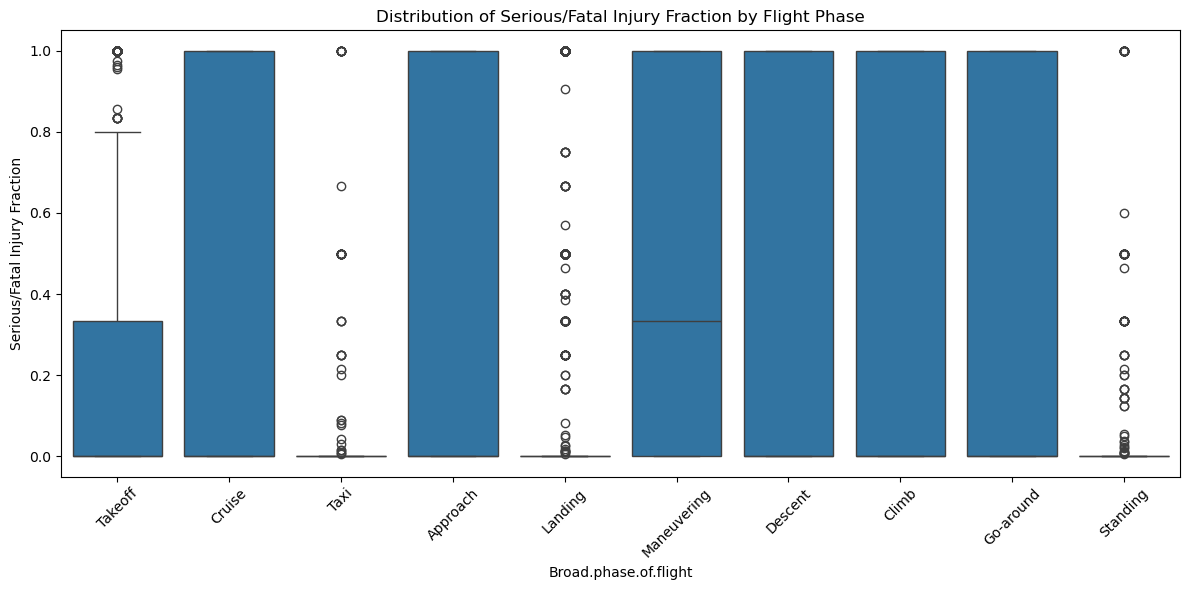

In [72]:
# filter for common flight phases
phase_counts = air_df["Broad.phase.of.flight"].value_counts()
valid_phases = phase_counts[phase_counts >= 10].index
phase_filtered = air_df[air_df["Broad.phase.of.flight"].isin(valid_phases)]

# plot serious/fatal injury fraction by phase
plt.figure(figsize=(12, 6))
sns.boxplot(data=phase_filtered, x="Broad.phase.of.flight", y="ser_inj_frac")
plt.title("Distribution of Serious/Fatal Injury Fraction by Flight Phase")
plt.ylabel("Serious/Fatal Injury Fraction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Certain phases of flight—like takeoff and landing—tend to have more severe outcomes than cruising. The data shows that injury severity is more variable and sometimes higher during these moments, probably because they’re more dynamic and leave less room for recovery if something goes wrong.